In [1]:
import numpy as np
from math import pi, exp, sin
import nmm as nm
import ensembles as en
import auxfunctions as aux
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
N = 3

def mc_simulation2D(numsteps, lag=1):
    x = 1; y = 1
    mc_traj = []

    for i in range(numsteps):
        dx = np.random.uniform(-pi,pi)
        dy = np.random.uniform(-pi,pi)
        if (np.random.random() < exp(-(energy(x+dx,y+dy)-energy(x,y))) ):
            x = x + dx; y = y + dy
        if i%lag == 0:
            mc_traj += [[x,y]]
    return np.array(mc_traj)

def mapping_function2D(vector2D):
    length = 6*pi
    #----------
    x = vector2D[0]
    y = vector2D[1]
    return N*int(x*N/length)+int(y*N/length)

def energy(x,y):
    if (x > 6*pi) or (x < 0) or (y > 6*pi) or (y < 0):
        return 10**10
    else:
        ener = 1.5*(1 - sin(x) * sin(y)) + 0.0009*(((x - (9 * sin(y/3) + y))**2) * (y - (9*sin(x/3) + x))**2)
        return ener

In [3]:
trajectory = mc_simulation2D(500000, lag=1)

In [4]:
myensemble = en.Ensemble([trajectory])
print(myensemble)


Continuous, Ensemble with 1 (2-dimensional) trajectories
Total number of snapshots: 500000


In [5]:
d_ensemble = en.DiscreteEnsemble.from_ensemble(myensemble, map_function=mapping_function2D)

In [6]:
stateA = [0,1]
stateB = [N*N-1, N*N-2]
dtraj = d_ensemble.trajectories

In [7]:
nm_model = nm.NonMarkovModel(dtraj, stateA, stateB, lag_time=1)

In [8]:
print(nm_model.empirical_mfpts()['mfptAB'])
print(nm_model.mfpts()['mfptAB'])

Number of A->B/B->A  events: 2077/2076
122.0
121.992844303


In [9]:
nm_model.popA

0.21348368963172754

In [10]:
nm_model.popB

0.19938123198842167

In [11]:
nm_model.markovian=True

In [12]:
print(nm_model.mfpts())
print(nm_model.populations())

{'mfptAB': 78.166470759330082, 'mfptBA': 75.255413739223854}
[ 0.07827553  0.13324286  0.14268218  0.12915834  0.08840145  0.13267455
  0.09013143  0.13522663  0.07020701]


In [13]:
nm_model.markovian=False

In [14]:
print(nm_model.mfpts())
print(nm_model.populations())

{'mfptAB': 121.99284430327087, 'mfptBA': 118.78511780807739}
[ 0.07826703  0.13324655  0.14268321  0.12917015  0.08840979  0.13267039
  0.09012514  0.13521666  0.07021108]


In [26]:
nm_model.lag_time = 5

In [27]:
nm_model.mfpts()

{'mfptAB': 157.40030411738738, 'mfptBA': 151.30634400014057}

In [28]:
times = list(range(5,500,20))
corr_values = nm_model.empirical_corr_function(nm_model.stateA, nm_model.stateB, times=times, symmetric=False)
corr_values2 = nm_model.empirical_corr_function(nm_model.stateA, nm_model.stateB, times=times)
corr_values3 = nm_model.empirical_corr_function(nm_model.stateB, nm_model.stateA, times=times, symmetric=False)
corr_valuesAA = nm_model.empirical_corr_function(nm_model.stateA, nm_model.stateA, times=times)
corr_valuesBB = nm_model.empirical_corr_function(nm_model.stateB, nm_model.stateB, times=times)

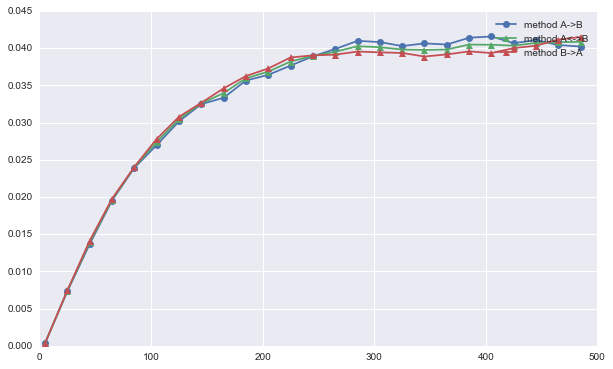

In [29]:
fig = plt.figure(figsize=(10,6))
plt.plot(times, corr_values, '-o', label='method A->B')
plt.plot(times, corr_values2, '-^',label='method A<->B')
plt.plot(times, corr_values3, '-^',label='method B->A')
plt.legend()
plt.show()

In [30]:
nm_model.lag_time

5

In [31]:
nm_pAA, nm_pAB, nm_pBA, nm_pBB = nm_model.corr_function(times=times)

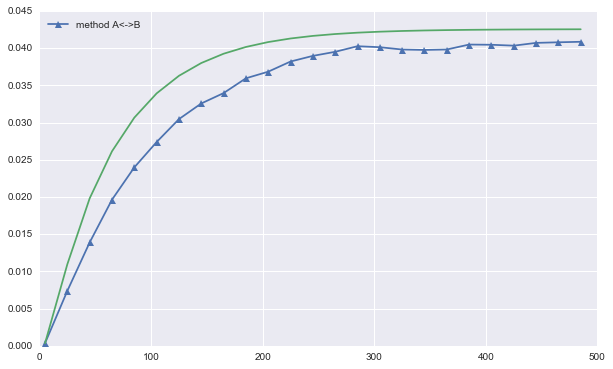

In [32]:
fig = plt.figure(figsize=(10,6))
plt.plot(times, corr_values2, '-^',label='method A<->B')
plt.plot(times, nm_pAB)
plt.legend(loc=0)
plt.show()

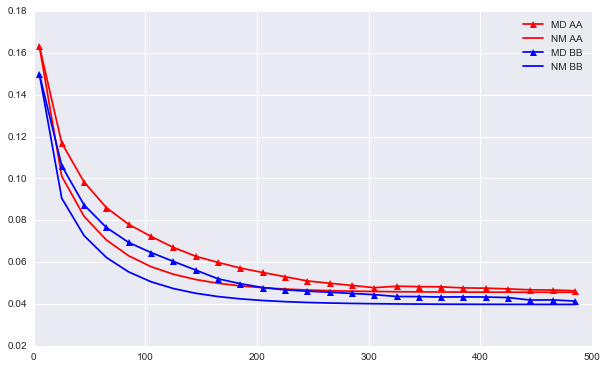

In [33]:
fig = plt.figure(figsize=(10,6))
plt.plot(times, corr_valuesAA, '-^',label='MD AA', color='red')
plt.plot(times, nm_pAA,label='NM AA', color='red')
plt.plot(times, corr_valuesBB, '-^',label='MD BB',color='blue')
plt.plot(times, nm_pBB,label='NM BB',color='blue')
plt.legend(loc=0)
plt.show()

In [34]:
nm_model.markovian = True
msm_pAA, msm_pAB, msm_pBA, msm_pBB = nm_model.corr_function(times=times)
nm_model.markovian = False

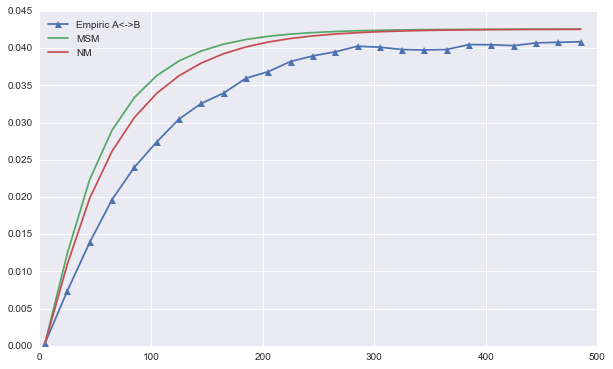

In [35]:
fig = plt.figure(figsize=(10,6))
plt.plot(times, corr_values2, '-^',label='Empiric A<->B')
plt.plot(times, msm_pAB, label='MSM')
plt.plot(times, nm_pAB, label='NM')
plt.legend(loc=0)
plt.show()

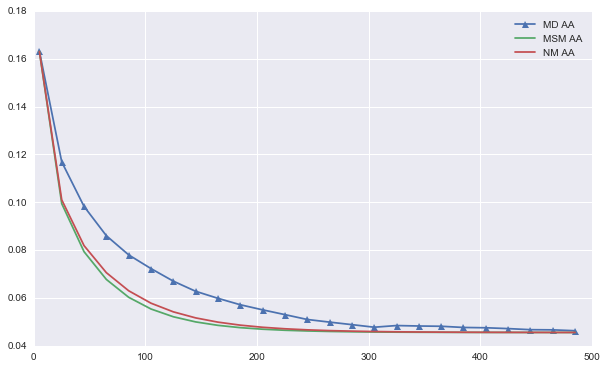

In [36]:
fig = plt.figure(figsize=(10,6))
plt.plot(times, corr_valuesAA, '-^',label='MD AA')
plt.plot(times, msm_pAA,label='MSM AA')
plt.plot(times, nm_pAA,label='NM AA')
plt.legend(loc=0)
plt.show()